![](images/obspy_logo_full_524x179px.png)

<div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Breve guida a ObsPy: il tempo</div>

Questa guida trae spunto dal Tutorial di:

* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))

Seismo-Live: http://seismo-live.org

---

Breve guida a `UTCDateTime`. Non molto difficile ma importante da conoscere perché è usato **ovunque** in ObsPy!


* Tutti i valori assoluti del tempo sono gestiti in modo coerente con questa classe.
* Basato su un timestamp intero POSIX con precisione di nanosecondi.
* È possibile specificare il fuso orario al momento dell'inizializzazione (se necessario).
* In Coordinated Universal Time (UTC) quindi non c'è bisogno di gestire i fusi orari, l'ora legale, ...


---

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 24, 16

---

## Caratteristiche di **`UTCDateTime`**

#### Initializzazione

In [2]:
from obspy import UTCDateTime

print(UTCDateTime("2014-08-24T10:20:44.0"))        # ISO standard
print(UTCDateTime("2014-08-24T01:20:44.0-09:00"))  # Imput non-UTC timezone
print(UTCDateTime(2014, 8, 24, 10, 20, 44))        # anno, mese, giorno, ora , min, sec, musec
print(UTCDateTime(1408875644.0))                   # timestamp

2014-08-24T10:20:44.000000Z
2014-08-24T10:20:44.000000Z
2014-08-24T10:20:44.000000Z
2014-08-24T10:20:44.000000Z


In [7]:
# Il tempo presente può essere inizializzato senza nessun argomento
print(UTCDateTime())

2018-04-17T07:10:30.514580Z


#### Accesso agli Attributi

In [8]:
time = UTCDateTime("2014-08-24T10:20:44.0")
print(time.year)
print(time.julday)
print(time.timestamp)
print(time.weekday)
# try time.<Tab>

2014
236
1408875644.0
6


#### Gestire le differenze di orario

* "**`+`**/**`-`**" definito per aggiungere/togliere secondi ad un oggetto **`UTCDateTime`**
* "**`-`**" definito per ottenere la differenza di tempo tra due oggetti **`UTCDateTime`**

In [9]:
time = UTCDateTime("2014-08-24T10:20:44.0")
print(time)

2014-08-24T10:20:44.000000Z


In [11]:
# un'ora più tardi (attenzione il tempo va espresso in secondi)
print(time + 3600)

2014-08-24T11:20:44.000000Z


In [12]:
# Differenze di timpo
time2 = UTCDateTime(2015, 1, 1)
print(time2 - time)

11194756.0


### Esercizi

#### Calcolare il numero di giorni trascorsi dal terremoto di South Napa del 2014 (24/08/2014 ore 11:20:44).

In [7]:
print((UTCDateTime() - UTCDateTime("2014-08-24T11:20:44.000000Z")) / 86400)

1328.07647557


#### Scrivere una lista di 10 oggetti UTCDateTime, cominciando da oggi alle 10:00 intervallati ogni 90 minuti.

In [11]:
time = UTCDateTime(2018,04,13,10,00,00)
t = []
for i in range(0,10):
    t2 = time + i*90*60
    t.append(t2)
t

[2018-04-13T10:00:00.000000Z,
 2018-04-13T11:30:00.000000Z,
 2018-04-13T13:00:00.000000Z,
 2018-04-13T14:30:00.000000Z,
 2018-04-13T16:00:00.000000Z,
 2018-04-13T17:30:00.000000Z,
 2018-04-13T19:00:00.000000Z,
 2018-04-13T20:30:00.000000Z,
 2018-04-13T22:00:00.000000Z,
 2018-04-13T23:30:00.000000Z]

#### Di seguito è riportata una lista di stringhe con i tempi di origine dei terremoti di magnitudo 8+ dall'anno 2000 (recuperati da IRIS). Costruire una lista di tempi trascorsi (in giorni) tra un evento ed il successivo. Usare matplotlib per visualizzare un istogramma.

In [13]:
times = ["2000-11-16T04:54:56",
         "2001-06-23T20:33:09",
         "2003-09-25T19:50:07",
         "2004-12-23T14:59:00",
         "2004-12-26T00:58:52",
         "2005-03-28T16:09:35",
         "2006-05-03T15:26:39",
         "2006-06-01T18:57:02",
         "2006-06-05T00:50:31",
         "2006-11-15T11:14:14",
         "2007-01-13T04:23:23",
         "2007-04-01T20:39:56",
         "2007-08-15T23:40:58",
         "2007-09-12T11:10:26",
         "2009-09-29T17:48:11",
         "2010-02-27T06:34:13",
         "2011-03-11T05:46:23",
         "2012-04-11T08:38:37",
         "2012-04-11T10:43:10",
         "2013-05-24T05:44:49",
         "2014-04-01T23:46:47",
         "2015-09-16T22:54:32",
         "2017-09-08T04:49:21"]

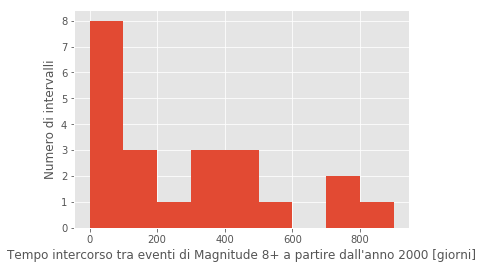

In [26]:
import matplotlib.pyplot as plt

inter_event_times = []

for i in range(1, len(times)):
    dt = UTCDateTime(times[i]) - UTCDateTime(times[i-1])
    dt = dt / (3600 * 24)
    inter_event_times.append(dt)
#    print(dt)
#print(max(inter_event_times))  

plt.hist(inter_event_times, bins=range(0, 1000, 100))
plt.xlabel("Tempo intercorso tra eventi di Magnitude 8+ a partire dall'anno 2000 [giorni]")
plt.ylabel("Numero di intervalli")
plt.show()